Importações de Bibliotecas

---



In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler

Tratamento de Dados

---



In [ ]:
db = pd.read_csv('/content/drive/MyDrive/ProjetoIA/eburnout2.csv')

In [ ]:
db.rename(columns={'EJERCICIO FISICO' : 'EJERCICIO_FISICO'}, inplace = True)
db.rename(columns={'HORAS_DE_SUEÑO' : 'HORAS_DE_SUENO'}, inplace = True)
db.rename(columns={'VIVE_EN_PAREJA ' : 'VIVE_EN_PAREJA'}, inplace = True)
db = db.astype({'FUMADOR': int, 'EDAD': int})

In [ ]:
db = db.drop(['USUARIO', 'PESO', 'ALTURA', 'HOSPITAL', 'ESPECIALIDAD', 'ESTADO_CIVIL'], axis=1)

In [ ]:
X = db.drop(['BURNOUT'], axis=1)
y = db['BURNOUT']

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

Visualização de Dados

---



In [ ]:
db

,SEXO,EDAD,NUMERO_HIJOS,HORAS_DE_SUENO,EJERCICIO_FISICO,LECTURA,TIEMPO_VIDA_LABORAL,FUMADOR,VIVE_EN_PAREJA,BURNOUT
0,1,28,0,9.0,40.0,1,9.0,1,0,0
1,1,28,0,9.0,41.0,1,9.0,1,0,0
2,1,28,0,9.0,42.0,1,9.0,1,0,0
3,1,28,0,9.0,43.0,1,9.0,1,0,0
4,1,28,0,8.5,44.0,1,9.0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
1344,0,68,3,4.5,103.0,0,-71.0,0,0,1
1345,0,68,3,4.4,104.0,0,-71.0,0,0,1
1346,0,68,3,4.4,105.0,0,-71.0,0,0,1
1347,0,68,3,4.4,106.0,0,-71.0,0,0,1


In [ ]:
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1349 entries, 0 to 1348
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   SEXO                 1349 non-null   int64  
 1   EDAD                 1349 non-null   int64  
 2   NUMERO_HIJOS         1349 non-null   int64  
 3   HORAS_DE_SUENO       1349 non-null   float64
 4   EJERCICIO_FISICO     1349 non-null   float64
 5   LECTURA              1349 non-null   int64  
 6   TIEMPO_VIDA_LABORAL  1349 non-null   float64
 7   FUMADOR              1349 non-null   int64  
 8   VIVE_EN_PAREJA       1349 non-null   int64  
 9   BURNOUT              1349 non-null   int64  
dtypes: float64(3), int64(7)
memory usage: 105.5 KB


<Axes: xlabel='count', ylabel='BURNOUT'>

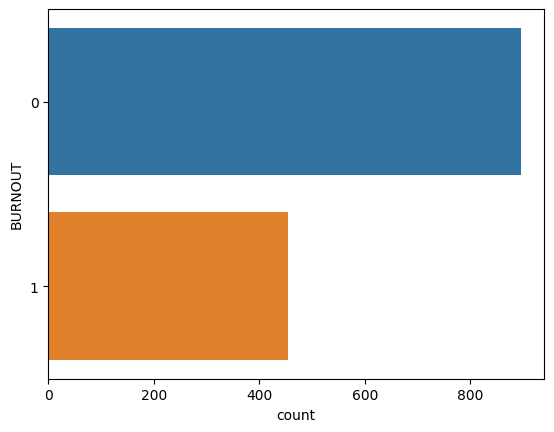

In [ ]:
sns.countplot(y='BURNOUT', data=db)

In [ ]:
db['BURNOUT'].value_counts()

0    895
1    454
Name: BURNOUT, dtype: int64

Decision Tree

---



In [ ]:
dt = DecisionTreeClassifier().fit(X_train, y_train)

acc_teste = dt.score(X_test, y_test)*100
print(f'Acurácia no teste: {acc_teste:.1f}%')
acc_treino = dt.score(X_train, y_train)*100
print(f'Acurácia no treino: {acc_treino:.1f}%')

Acurácia no teste: 85.2%
Acurácia no treino: 100.0%


In [ ]:
'''
Aplicando o algoritmo DecisionTree sem variar os hiperparâmetros temos um caso
de overfitting. Iremos utilizar a técnica de Pré e Pós-Poda para ajustar esse
resultado.
'''

ccp_alpha (Pós-Poda)



In [ ]:
clf = DecisionTreeClassifier(random_state=0)
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [ ]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=42, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)

print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)
acc_teste = clf.score(X_test, y_test)*100
print(f'Acurácia no teste: {acc_teste:.1f}%')
acc_treino = clf.score(X_train, y_train)*100
print(f'Acurácia no treino: {acc_treino:.1f}%')

Number of nodes in the last tree is: 1 with ccp_alpha: 0.0074339596703564825
Acurácia no teste: 68.6%
Acurácia no treino: 65.4%


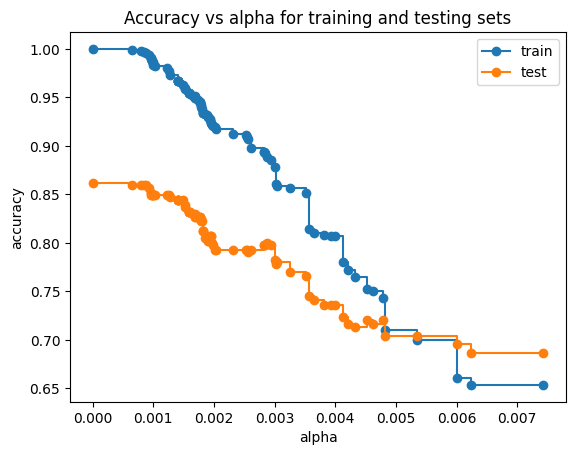

In [ ]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [ ]:
'''
A partir desse gráfico podemos ver a relação do número alpha com a acurácia.
Vemos que o gap entre treino e teste é considerávelmente alto quando a acurácia
é alta, diminuindo apenas quando o alpha está por volta de 0.003-0.004, com a acurácia
entre 75-80 no teste e 80-85 no treino.
'''

In [ ]:
dt = DecisionTreeClassifier(random_state=42, ccp_alpha=0.0045).fit(X_train, y_train)

acc_teste = dt.score(X_test, y_test)*100
print(f'Acurácia no teste: {acc_teste:.1f}%')
acc_treino = dt.score(X_train, y_train)*100
print(f'Acurácia no treino: {acc_treino:.1f}%')

Acurácia no teste: 71.4%
Acurácia no treino: 76.5%


In [ ]:
'''
Aplicando apenas o alpha já conseguimos um resultado melhor que o anterior,
mas para tentar aumentar um pouco mais da acurácia vamos variar alguns
hiperparâmetros de pré-poda (max_depth, min_samples_leaf, min_samples_split)
'''

In [ ]:
dt = DecisionTreeClassifier(random_state=42)
kf = KFold(n_splits=10)
param_grid = {'max_depth':[i for i in range(1,25)],
              'min_samples_leaf':[i for i in range(1, 10)],
              'min_samples_split': [i for i in range(2, 10)],
              'ccp_alpha': [0.0032]}

gs = GridSearchCV(estimator=dt, param_grid=param_grid, cv=kf,
                  scoring='accuracy')

dt_gridcv = gs.fit(X_train, y_train)

In [ ]:
dt_gridcv.best_params_

{'ccp_alpha': 0.0032,
 'max_depth': 21,
 'min_samples_leaf': 1,
 'min_samples_split': 5}

In [ ]:
dt_otima =DecisionTreeClassifier().set_params(**dt_gridcv.best_params_,
                                              random_state=42)

dt_otima.fit(X_train, y_train)
acc_teste = dt_otima.score(X_test, y_test)*100
print(f'Acurácia no teste: {acc_teste:.1f}%')
acc_treino = dt_otima.score(X_train, y_train)*100
print(f'Acurácia no treino: {acc_treino:.1f}%')

Acurácia no teste: 78.0%
Acurácia no treino: 85.9%


Desempenho Treino/Teste

In [ ]:
#Treino
ytr_pred = dt_otima.predict(X_train)

print(classification_report(y_train, ytr_pred))

              precision    recall  f1-score   support

           0       0.85      0.94      0.90       617
           1       0.87      0.70      0.77       327

    accuracy                           0.86       944
   macro avg       0.86      0.82      0.84       944
weighted avg       0.86      0.86      0.85       944



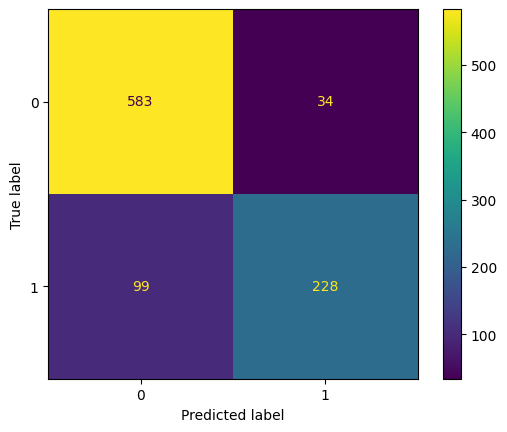

In [ ]:
cm = confusion_matrix(y_train, ytr_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dt_otima.classes_)
disp.plot()

In [ ]:
#Teste
yte_pred = dt_otima.predict(X_test)

print(classification_report(y_test, yte_pred))

              precision    recall  f1-score   support

           0       0.81      0.88      0.85       278
           1       0.68      0.56      0.61       127

    accuracy                           0.78       405
   macro avg       0.75      0.72      0.73       405
weighted avg       0.77      0.78      0.77       405



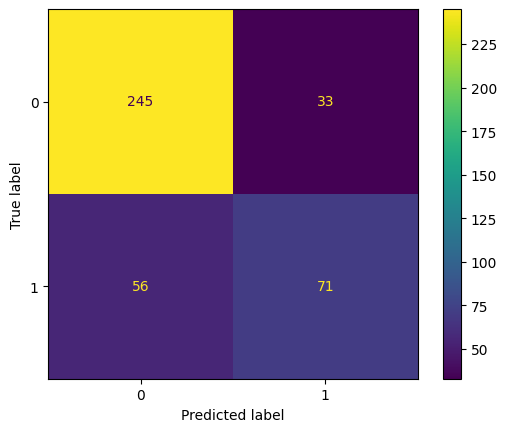

In [ ]:
cm = confusion_matrix(y_test, yte_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dt_otima.classes_)
disp.plot()

In [ ]:
'''
Podemos notar que o classificador não está conseguindo um bom desempenho na
classificação correta dos caso positivos (1) para burnout.
'''

Gradient Boosting

---



In [ ]:
gb = GradientBoostingClassifier().fit(X_train, y_train)

acc_teste = gb.score(X_test, y_test)*100
print(f'Acurácia no teste: {acc_teste:.1f}%')
acc_treino = gb.score(X_train, y_train)*100
print(f'Acurácia no treino: {acc_treino:.1f}%')

Acurácia no teste: 77.3%
Acurácia no treino: 84.4%


In [ ]:
'''
Apenas com o classificador Gradient Boosting já obtemos um resultado
similar ao obtido com o Decision Tree, iremos variar os hiperparâmetros
para chegarmos a um desempenho melhor
'''

In [ ]:
gb = GradientBoostingClassifier(random_state=42)
kf = KFold(n_splits=5)
param_rand = {'learning_rate':[0.02 , 0.04],
              'n_estimators':[100, 200],
              'max_features': ['log2'],
              'max_depth': [i for i in range(1,5)]}

rs = RandomizedSearchCV(estimator=gb, param_distributions=param_rand, cv=kf,
                  scoring='accuracy')

gb_randomcv = rs.fit(X_train, y_train)

In [ ]:
gb_randomcv.best_params_

{'n_estimators': 200,
 'max_features': 'log2',
 'max_depth': 4,
 'learning_rate': 0.04}

In [ ]:
gb_otima = GradientBoostingClassifier().set_params(**gb_randomcv.best_params_, random_state=42)

gb_otima.fit(X_train, y_train)
acc_teste = gb_otima.score(X_test, y_test)*100
print(f'Acurácia no teste: {acc_teste:.1f}%')
acc_treino = gb_otima.score(X_train, y_train)*100
print(f'Acurácia no treino: {acc_treino:.1f}%')

Acurácia no teste: 81.2%
Acurácia no treino: 86.2%


Desempenho Treino/Teste

In [ ]:
#Treino
ytr_pred = gb_otima.predict(X_train)

print(classification_report(y_train, ytr_pred))

              precision    recall  f1-score   support

           0       0.84      0.98      0.90       617
           1       0.93      0.65      0.77       327

    accuracy                           0.86       944
   macro avg       0.89      0.81      0.83       944
weighted avg       0.87      0.86      0.86       944



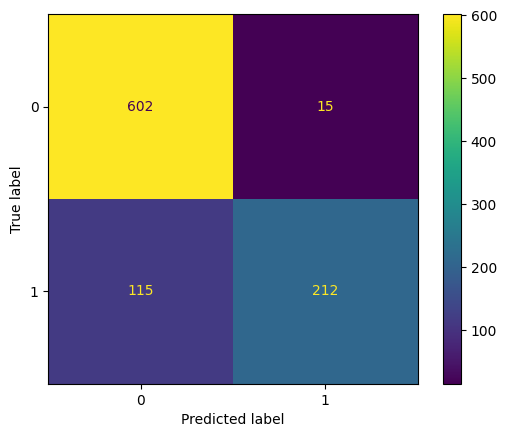

In [ ]:
cm = confusion_matrix(y_train, ytr_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=gb_otima.classes_)
disp.plot()

In [ ]:
#Teste
yte_pred = gb_otima.predict(X_test)

print(classification_report(y_test, yte_pred))

              precision    recall  f1-score   support

           0       0.81      0.94      0.87       278
           1       0.81      0.53      0.64       127

    accuracy                           0.81       405
   macro avg       0.81      0.74      0.76       405
weighted avg       0.81      0.81      0.80       405



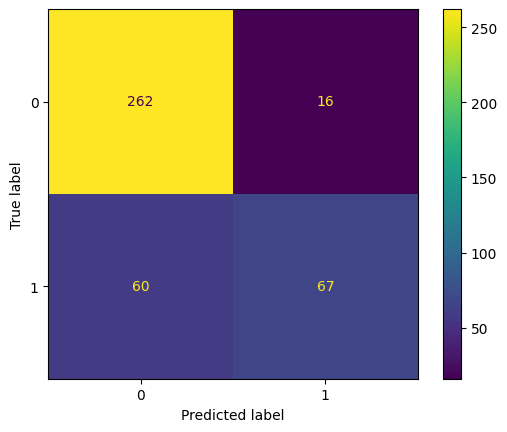

In [ ]:
cm = confusion_matrix(y_test, yte_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=gb_otima.classes_)
disp.plot()

In [ ]:
'''
Podemo observar, que assim como no Decision Tree, esse classificador
também não apresentar bom desempenho na classificação de casos positivos
'''